# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [2]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
north_df.value_counts(["Rep ID"])
north_df["Rep ID"].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
south_df.value_counts(["Rep ID"])
south_df["Rep ID"].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
north_df[["Busy Minutes","Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
south_df[["Busy Minutes","Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used:


# i did this code first, it was wrong but keeping it for myself because I liked seeing them side by side:

# north_timeblock = north_df[["Time Block","Calls"]].groupby("Time Block").count()
# new_north = north_timeblock.rename(columns={"Calls":"North Branch Calls"})
# south_timeblock = south_df[["Time Block","Calls"]].groupby("Time Block").count()
# new_south = south_timeblock.rename(columns={"Calls":"South Branch Calls"})
# north_south_timeblock = pd.concat([new_north, new_south], axis =1)
# north_south_timeblock

# first, group the data by Time Blocks to get a list of the number of calls for each branch for each time block
north_timeblock = north_df[["Time Block","Calls"]].groupby("Time Block").count()
south_timeblock = south_df[["Time Block","Calls"]].groupby("Time Block").count()
# combine the two dfs into one, retaining Time Block as the distinguishing factor
combined_timeblock = north_timeblock.merge(south_timeblock, on="Time Block")
# sum the number of calls for each branch into one column labeled "Calls"
combined_timeblock["Calls"] = (combined_timeblock["Calls_x"] + combined_timeblock["Calls_y"])
# remove the north and south specific columns
combined_timeblock = combined_timeblock.drop('Calls_x',axis =1)
combined_timeblock = combined_timeblock.drop('Calls_y',axis =1)
# voila
combined_timeblock

,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: input with mean values

In [9]:
# Code Used
# Add Additional Cells as needed.
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [10]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [11]:
#input with mean values!
north_incoming_mean = north_df["Incoming Wait Time"].mean()
north_incoming_mean

3.048780487804878

In [12]:
# check value counts
north_df["Incoming Wait Time"].value_counts()

4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [13]:
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna(north_df["Incoming Wait Time"].mean())
north_df["Incoming Wait Time"].value_counts()

3.04878    163
4.00000     20
1.00000     17
5.00000     17
2.00000     16
3.00000     12
Name: Incoming Wait Time, dtype: int64

In [14]:
south_incoming_mean = south_df["Incoming Wait Time"].mean()
south_incoming_mean

3.0

In [15]:
south_df["Incoming Wait Time"].value_counts()

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [16]:
south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].fillna(south_df["Incoming Wait Time"].mean())
south_df["Incoming Wait Time"].value_counts()

3.0    217
4.0     30
2.0     28
1.0     20
5.0     19
Name: Incoming Wait Time, dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I replaced the values with the same "YES" so that counts of this type would be accurate. Knowing which calls ended in a sale is probably important for what the company needs to know, so this needs to be accurate. 

In [17]:
#Code Used
# Add Additional Cells as needed.
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [18]:
def fix_yes(series):
    if series == "NO":
        return "NO"
    else:
        return "YES"
north_df["Sale"] = north_df["Sale"].apply(fix_yes)

north_df["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: below code shows that there are none!

In [19]:
north_df.duplicated().sum()

0

In [20]:
south_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: None of the data seems to be unnecessary, so I did not do anything to it.

In [21]:
#Code Used
# Add Additional Cells as needed.

# Queue maybe? Without knowing more about the dataset, it's hard to say.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [22]:
# Create dataframe for the entire company named df

df = pd.concat([north_df,south_df])


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls


In [23]:
# Code Used
# Add Additional Cells as needed.
rep_df = pd.pivot_table(df,index=["Branch","Rep ID"],values="Calls",aggfunc=np.sum)
rep_df

Calls
Branch Rep ID       
North  Amanda     23
       Andy       23
       Brent      37
       Cam        24
       Duke       29
       Joe        26
       Lilly      30
       Todd       29
       Xander     24
South  Alice      20
       Eric       35
       George     29
       Helga      31
       Josh       26
       Karl       28
       Kate       29
       Randy      33
       Sandy      32
       Sharon     25
       Susan      26

In [24]:
rep_df.sort_values(by="Calls",ascending=False)

Calls
Branch Rep ID       
North  Brent      37
South  Eric       35
       Randy      33
       Sandy      32
       Helga      31
North  Lilly      30
       Duke       29
       Todd       29
South  Kate       29
       George     29
       Karl       28
       Josh       26
       Susan      26
North  Joe        26
South  Sharon     25
North  Xander     24
       Cam        24
       Andy       23
       Amanda     23
South  Alice      20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? no! :)

In [25]:
# Code Used
# Add Additional Cells as needed.
north_abandon = north_df["Abandoned"].mean() * 100
north_abandon

2.857142857142857

In [26]:
south_abandon = south_df["Abandoned"].mean() * 100
south_abandon

1.2738853503184715

In [27]:
combined_abandon = df["Abandoned"].mean() * 100
combined_abandon

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%, 33 calls
- South Branch = 15.29%, 48 calls
- Company Wide = 14.49%, 81 calls

This may not be accurate because over 50% of the data for the Incoming Wait Time column was missing in both datasets and was filled with the average of values recorded.

In [28]:
# Code Used
# Add Additional Cells as needed.

#write code to evaluate if answered in two seconds or less
def service_level(series):
    if series <=2:
        return True
    else:
        return False
    
north_df["Service Level"] = north_df["Incoming Wait Time"].apply(service_level)
north_df["Service Level"].value_counts()

False    212
True      33
Name: Service Level, dtype: int64

In [29]:
# this is the percentage
(33 / (33+212) ) *100

13.46938775510204

In [30]:
south_df["Service Level"] = south_df["Incoming Wait Time"].apply(service_level)
south_df["Service Level"].value_counts()

False    266
True      48
Name: Service Level, dtype: int64

In [31]:
# percentage
(48 / (48+266)) * 100

15.286624203821656

In [32]:
df["Service Level"] = df["Incoming Wait Time"].apply(service_level)
df["Service Level"].value_counts()

False    478
True      81
Name: Service Level, dtype: int64

In [33]:
# percentage
(81/(81+478))*100

14.490161001788909

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [34]:
# Code Used 
north_df["Incoming Wait Time"].mean()

3.048780487804877

In [35]:
south_df["Incoming Wait Time"].mean()

3.0

In [36]:
df["Incoming Wait Time"].mean()

3.0213796413456087

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because it will display each queue as a distinct visual value.

C:\Users\johan\AppData\Local\Temp\ipykernel_74004\3469068908.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


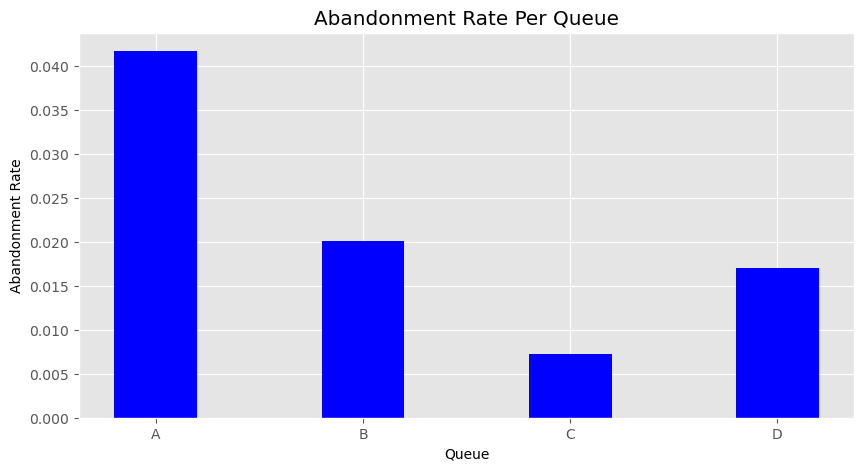

In [44]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
categories = list(abandonment_rates.keys())    
values = list(abandonment_rates.values())

#Your Code Here:
style.use('ggplot')
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(categories, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.title("Abandonment Rate Per Queue")
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because it will display each Rep ID as a distinct visual value.

In [78]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls
  
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level['Rep ID'] = service_level.index
service_level

,Calls_x,Calls_y,Service Level %,Rep ID
Rep ID,,,,
Amanda,3,5,60.000000,Amanda
Andy,3,10,30.000000,Andy
Brent,6,8,75.000000,Brent
Cam,5,11,45.454545,Cam
Duke,6,14,42.857143,Duke
Joe,2,10,20.000000,Joe
Lilly,4,12,33.333333,Lilly
Todd,2,6,33.333333,Todd
Xander,2,6,33.333333,Xander


In [85]:
north_plt

,Rep ID,Incoming Wait Time
0,Amanda,2.907741
1,Andy,3.288441
2,Brent,2.849044
3,Cam,2.984756
4,Duke,2.921783
5,Joe,3.260788
6,Lilly,3.062602
7,Todd,3.142136
8,Xander,3.119919


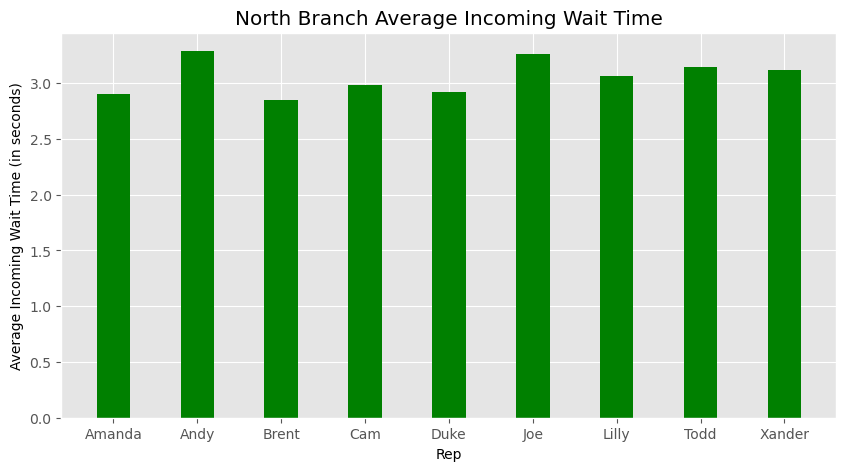

In [88]:
style.use('ggplot')
fig2 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.rcParams['figure.figsize'] = (20,10)

x_axis = north_plt["Rep ID"]
y_axis = north_plt["Incoming Wait Time"]
plt.bar(x_axis, y_axis, color ='green',
        width = 0.4)
 
plt.xlabel("Rep")
plt.ylabel("Average Incoming Wait Time (in seconds)")
plt.title("North Branch Average Incoming Wait Time")
plt.show()


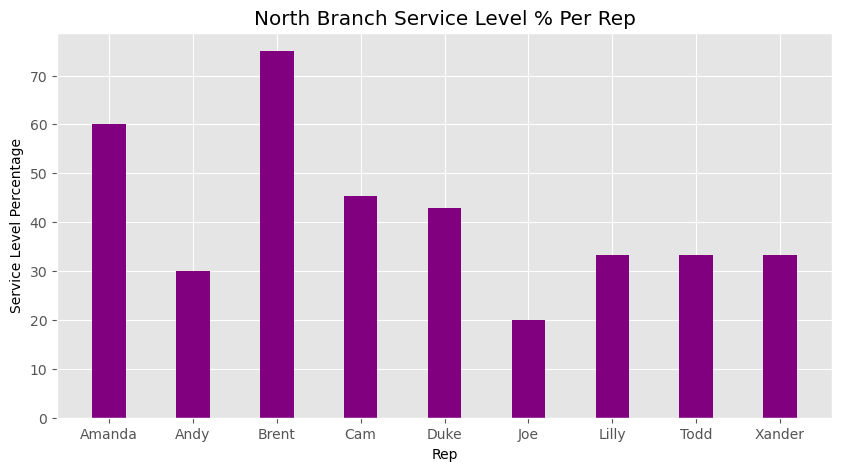

In [89]:
style.use('ggplot')
fig1 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.rcParams['figure.figsize'] = (20,10)

x_axis = service_level["Rep ID"]
y_axis = service_level["Service Level %"]
plt.bar(x_axis, y_axis, color ='purple',
        width = 0.4)
 
plt.xlabel("Rep")
plt.ylabel("Service Level Percentage")
plt.title("North Branch Service Level % Per Rep")
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a group bar chart because it will display each call type and call purpose as a distinct visual value.

In [99]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
type(purpose_counts)

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


pandas.core.series.Series

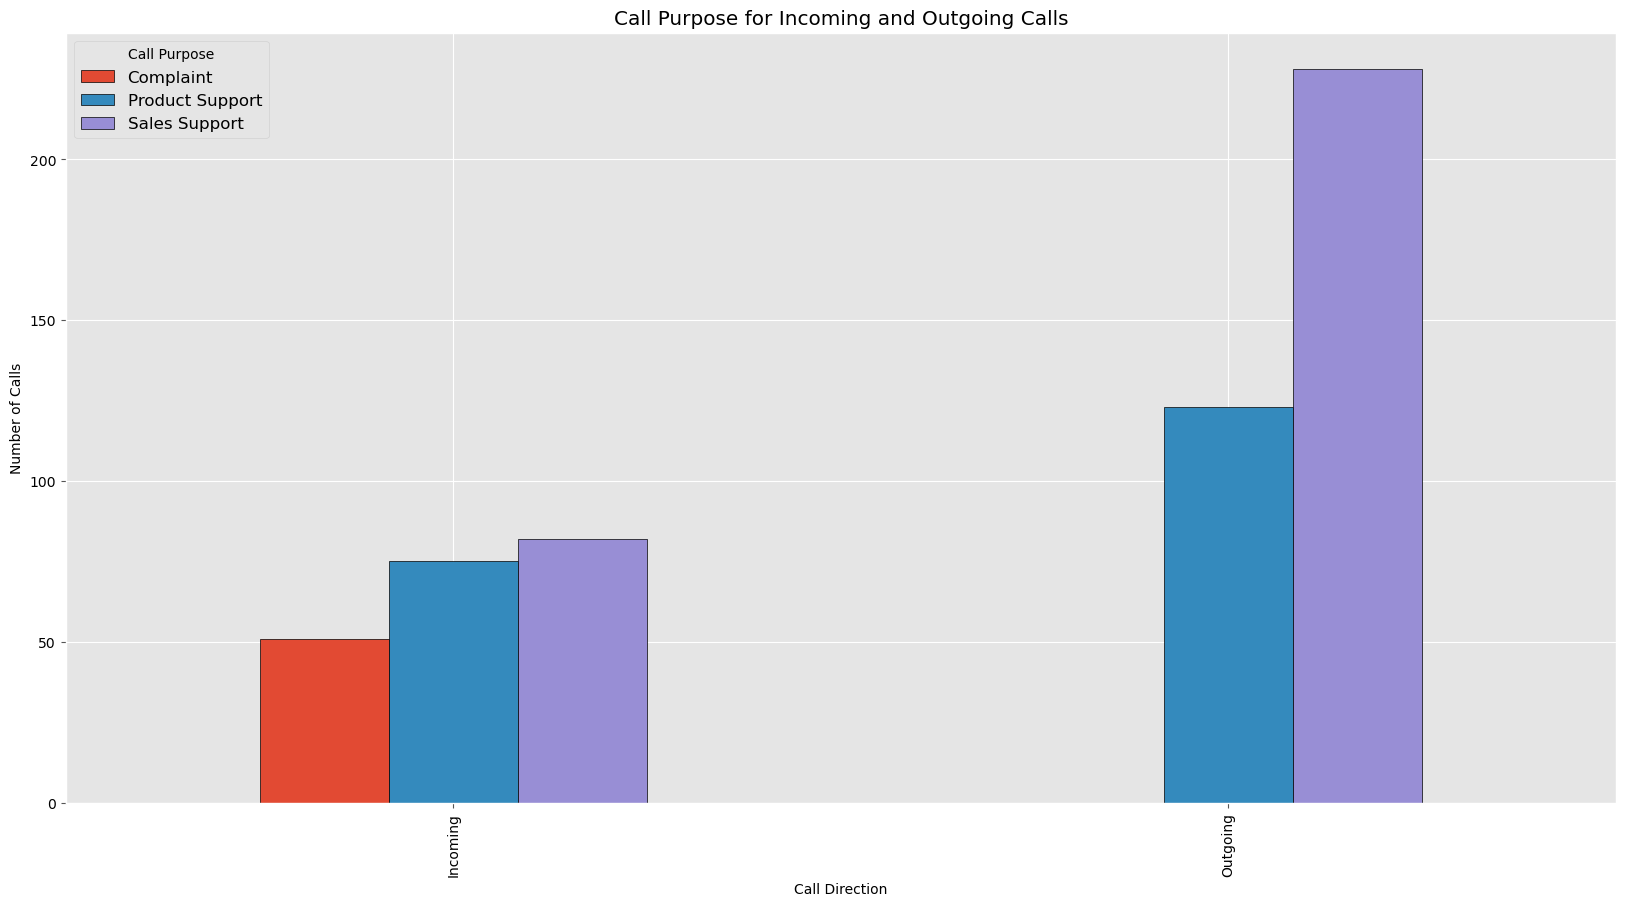

In [104]:

# fig3 = pd.DataFrame(df.loc[["Incoming","Outgoing"],call_purpose].T)

fig3 = pd.DataFrame({call_purpose[0]: complaints,call_purpose[1]: sales_support,call_purpose[2]: product_support})

fig3.plot.bar(edgecolor = 'black')
plt.title('Call Purpose for Incoming and Outgoing Calls',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Call Direction',color = 'black')
plt.ylabel('Number of Calls',color = 'black')
plt.legend(title = 'Call Purpose', fontsize = 12, labelcolor='black')
plt.savefig('bar_grouped.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South branch is operating more efficiently because they have a lower abandonment rate than that of the North branch, a higher service level, and a faster average spped of answer. 

abandonment rates 
North Branch = 2.86%
South Branch = 1.27%

service levels
North Branch = 13.47%, 33 calls
South Branch = 15.29%, 48 calls

average speed of answer
North Branch in seconds = 3.05
South Branch in seconds = 3.00

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
There are only 9 reps in the North branch (and 11 in the South branch). I believe the North branch, based on the less desirable measurements for the KPIs, would benefit the most from extra help. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I wish the Incoming Wait Time data wasn't missing so much as I think the data analysis would be more insightful if it was complete. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: